In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt

In [2]:
df = pd.read_csv('netflix_titles.csv') # the main dataset


In [3]:
# gives the count of total genre in dataset
def count_genres(strings):
    genre_count = Counter()
    for string in strings:
        string = string.split(",")
        genre_count.update(string)
    
    return genre_count # counts the number of time that genre appears

output = count_genres(df['listed_in'])
genres = pd.DataFrame() # create df
genres['genre'] = output.keys()
genres['count'] = output.values()

In [ ]:
# count of genre by year, top 1
# i can know which genre was most released on netflix that year
years = df['release_year'].unique() # getting unique years

yearwise_genre = pd.DataFrame(columns=['year', 'genre', 'count']) # creating df

# for every year
for year in years:
    # know the count of diff genres in the year
    temp = df[df['release_year'] == year]
    answer = count_genres(temp['listed_in'])

    # get top genre of the year
    top1 = answer.most_common(1)
 
    # add them to df
    new_row = pd.DataFrame({'year': [year], 'genre': [top1[0][0]], 'count': [top1[0][1]]})
    yearwise_genre = pd.concat([yearwise_genre, new_row], ignore_index=True)

yearwise_genre
yearwise_genre.to_csv('yearwise_genre1.csv', index=False)


In [6]:
# count of ratings in diff year
# i can know rating movies and tv shows were showed each year on netflix
from collections import Counter
years = df['release_year'].unique() # getting unique years

yearwise_ratings = pd.DataFrame(columns=['year', 'rating', 'count']) # creating df

def count_ratings(ratings):
    total_ratings = Counter()
    for rating in ratings:
        total_ratings.update([rating])
    
    return total_ratings

# for every year
for year in years:
    # know the count of diff genres in the year
    temp = df[df['release_year'] == year]
    answer = count_ratings(temp['rating'])
    # add them to df
    for key, value in answer.items():
        new_row = pd.DataFrame({'year': [year], 'rating': [key], 'count': [value]})
        yearwise_ratings = pd.concat([yearwise_ratings, new_row], ignore_index=True)
    

In [7]:
# total ratings in dataset
# overall all types of ratings present in dataset
ratings_total = pd.DataFrame(columns=['rating', 'count']) # creating df

ans_ratings = count_ratings(df['rating'])

# add them to df
for key, value in ans_ratings.items():
    new_row = pd.DataFrame({'rating': [key], 'count': [value]})
    ratings_total = pd.concat([ratings_total, new_row], ignore_index=True)

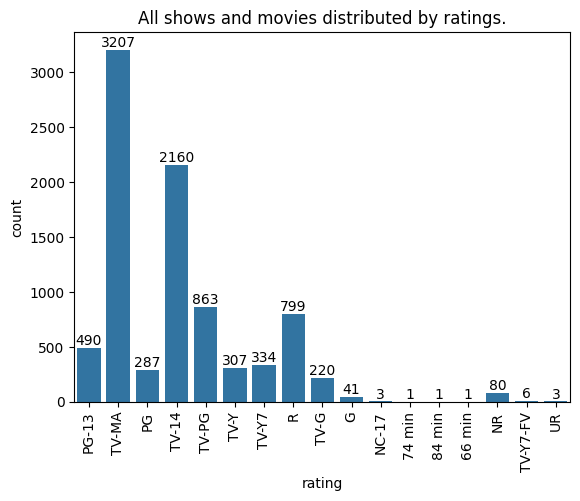

In [8]:
# creating bar graph for that ratings

ratings = pd.read_csv('ratings.csv')
barplot = sns.barplot(data=ratings, x='rating', y='count')
plt.xticks(rotation = 90)
plt.title('All shows and movies distributed by ratings.')

# Annotate the bars with their respective values
for container in barplot.containers:
    # Add the value to the top of each bar
    barplot.bar_label(container, fmt='%.0f')  # Use '%.0f' for integers

In [9]:
# mostly added genre of the years
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year
years = df['added_year'].unique()

genres = pd.DataFrame(columns=['year', 'genre', 'count'])
for year in years:
    temp = df[df['added_year'] == year]
    answer = count_genres(temp['listed_in'])

    top = answer.most_common(1)
    for key, value in top:
        new_row = pd.DataFrame({'year' : [year], 'genre' : [key], 'count' : [value]})
        genres = pd.concat([genres, new_row], ignore_index=True)

genres['year'] = genres['year'].astype(int)
# genres



C:\Users\HP\AppData\Local\Temp\ipykernel_19668\4208986612.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  genres = pd.concat([genres, new_row], ignore_index=True)


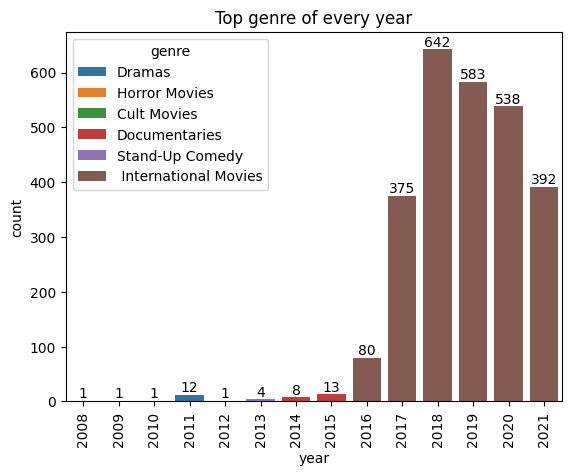

In [ ]:
# graph to show those genres

barplot = sns.barplot(data=genres, x='year', y='count', hue='genre')
plt.xticks(rotation=90)
plt.title('Top genre of every year')

# Annotate the bars with their respective values
for container in barplot.containers:
    # Add the value to the top of each bar
    barplot.bar_label(container, fmt='%.0f')  # Use '%.0f' for integers


In [13]:
# Drop NaN values from the 'country' column
df_countries = df['country'].dropna()

countries = pd.DataFrame(columns=['country', 'count'])

# gives the count of total countries in dataset
def count_countries(strings):
    country_count = Counter()
    for string in strings:
        string = string.split(",")
        for i in range(len(string)):
            string[i] = string[i].strip()
        country_count.update(string)
    
    return country_count # counts the number of time that countryappears

output = count_countries(df_countries)
for key, value in output.items():
    new_row = pd.DataFrame({'country': [key], 'count': [value]})
    countries = pd.concat([countries, new_row], ignore_index=True)

In [15]:
countries = countries.sort_values(by='count', ascending=False)
ccountries = countries.reset_index(drop=True)
countries.to_csv('countries.csv', index=False)

In [16]:
# lets do this later with clear mind 
# haha clear mind oh my god 😂🤣

countries10 = countries.head(10) # gives me top 10 countries where netflix release most content

# creating dataframe which tells which rating shows and movies are most released
ratings_perferred = pd.DataFrame(columns=['country', 'rating'])

# iterate over rows 
for _, row in countries10.iterrows():
    country = row['country']
    for _, row2 in df.iterrows():
        if country in str(row2['country']):
            new_row = pd.DataFrame({'country': [country], 'rating': [row2['rating']]})
            ratings_perferred = pd.concat([ratings_perferred, new_row], ignore_index=True)

In [17]:
ratings_perferred

,country,rating
0,United States,PG-13
1,United States,TV-MA
2,United States,PG-13
3,United States,TV-MA
4,United States,PG-13
...,...,...
7556,Mexico,TV-MA
7557,Mexico,PG-13
7558,Mexico,NR
7559,Mexico,TV-14


Text(0.5, 1.0, 'Top 10 countries by content added to')

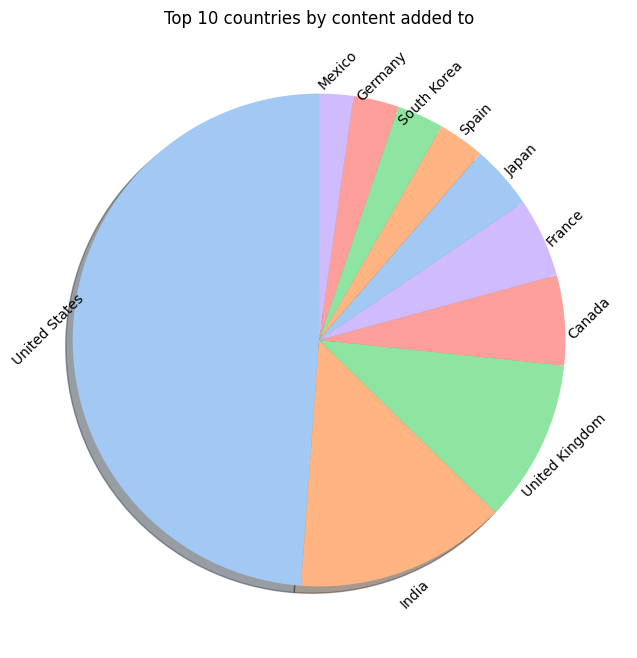

In [30]:
countries10 = countries.head(10) # getting top 10 countries 

# Define custom colors
colors = sns.color_palette('pastel')[0:5]

# Plotting the pie chart with custom colors and shadow
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(countries10['count'], labels=countries10['country'], startangle=90, colors=colors, shadow=True)

# Customize the labels
for text in texts:
    text.set_rotation(45)  # Rotate the labels by 45 degrees
    text.set_horizontalalignment('center')  # Center align the labels

# # Customize the percentage labels 
# for autotext in autotexts:
#     autotext.set_color('black')
#     autotext.set_rotation(45)

plt.title('Top 10 countries by content added to')


Text(0.5, 1.0, 'Percentage of content by type')

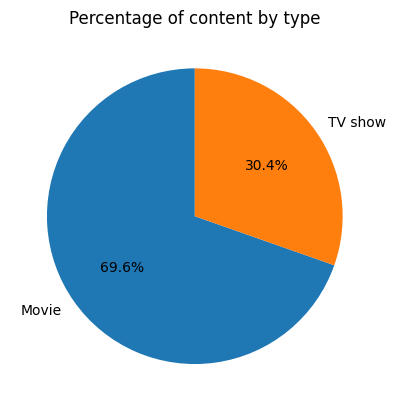

In [18]:
# tells which type of content dominate 

types = df.groupby(['type']).agg({'show_id': 'count'})
types = pd.DataFrame(types)

plt.pie(types['show_id'] , autopct = '%1.1f%%', labels=['Movie', 'TV show'], startangle=90)
plt.title('Percentage of content by type')

In [19]:
 # tells us about type of content dominate in different years
 
 # if we dont drop nan value from date_added before finding year it will convert the entire column into float so we will have to convert it to int and remvoe nan
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# df = df.dropna(subset=['date_added'])
df['year'] = df['date_added'].dt.year
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
in_year = df.groupby([df['year'], df['type']]).agg({'show_id' : 'count'})
in_year

show_id
year type            
2008 Movie          1
     TV Show        1
2009 Movie          2
2010 Movie          1
2011 Movie         13
2012 Movie          3
2013 Movie          6
     TV Show        4
2014 Movie         19
     TV Show        4
2015 Movie         56
     TV Show       17
2016 Movie        253
     TV Show      165
2017 Movie        839
     TV Show      325
2018 Movie       1237
     TV Show      388
2019 Movie       1424
     TV Show      575
2020 Movie       1284
     TV Show      594
2021 Movie        993
     TV Show      505

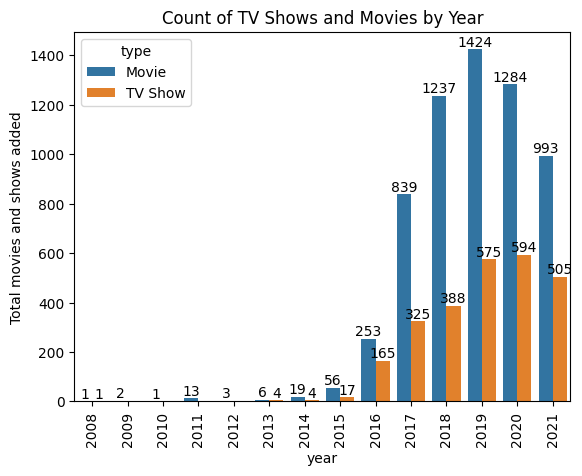

In [20]:
#bar graph to show which type dominate during different years

barplot = sns.barplot(data=in_year, x='year', hue='type', y='show_id')
plt.xticks(rotation=90)

# Add labels and title
plt.ylabel('Total movies and shows added')
plt.title('Count of TV Shows and Movies by Year')

# Annotate the bars with their respective values
for container in barplot.containers:
    # Add the value to the top of each bar
    barplot.bar_label(container, fmt='%.0f')  # Use '%.0f' for integers

# Show the plot
plt.show()

In [21]:
# since in one row there are so many country names that it is diffcult to get insight about trends in countrys
#  so i decided to create to copy of dataset and then create row for each country present in one row

# Drop rows where the 'country' column is NaN and split the 'country' column
split_countries_data = df.dropna(subset=['country']).copy()  # Remove rows with NaN in the 'country' column
split_countries_data = split_countries_data.assign(
    country=split_countries_data['country'].str.split(',')
).explode('country')  # Split by ', ' and explode into separate rows

# Strip any leading or trailing spaces from the 'country' names
split_countries_data['country'] = split_countries_data['country'].str.strip()

In [22]:
movies_show_10 = pd.DataFrame(columns=['country', 'type', 'count']) # create a dataset 

# Group by 'country' and 'type' and count 'show_id'
data_country = split_countries_data.groupby(['country', 'type']).agg({'show_id': 'count'}).reset_index()
data_country = data_country.sort_values(by='show_id', ascending=False)
countries = pd.read_csv('countries.csv') # reading file so i can access all the top 10 countries name and find data about them since i only care about them

for _, row1 in countries.head(10).iterrows():
    for _, row2 in data_country.iterrows():
        if row1['country'] == row2['country']:
            # Your logic here
            new_row = pd.DataFrame({'country': [row2['country']], 'type' : [row2['type']], 'count' : [row2['show_id']]})
            movies_show_10 = pd.concat([movies_show_10, new_row], ignore_index=True)

In [23]:
movies_show_10.to_csv('movies_show_10')
movies_show_10

,country,type,count
0,United States,Movie,2752
1,United States,TV Show,891
2,India,Movie,962
3,India,TV Show,83
4,United Kingdom,Movie,534
5,United Kingdom,TV Show,253
6,Canada,Movie,319
7,Canada,TV Show,113
8,France,Movie,303
9,France,TV Show,86


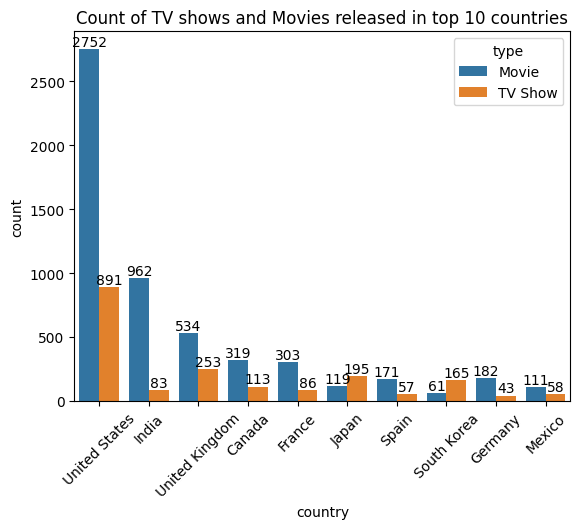

In [24]:
# graph to show which type dominate in top 10 countries 
barplot = sns.barplot(data=movies_show_10, x='country', hue='type', y='count')
plt.xticks(rotation=45)
plt.title('Count of TV shows and Movies released in top 10 countries')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f')
plt.show()

In [25]:
# here i seperate the genres in data set where i already have sepreated the countries so i can get some useful data
# to know which genre is most popular in top 10 countries 

# Drop rows where the 'country' column is NaN and split the 'genre' column
split_genre_data = split_countries_data.dropna(subset=['listed_in']).copy()  # Remove rows with NaN in the 'genre' column
split_genre_data = split_genre_data.assign(
    listed_in = split_genre_data['listed_in'].str.split(', ')
).explode('listed_in')  # Split by ',' and explode into separate rows

# Strip any leading or trailing spaces from the 'genre' names
split_genre_data['listed_in'] = split_genre_data['listed_in'].str.strip()

In [32]:
#creating dataset for genre famous in top 10 countries
genre_10 = pd.DataFrame(columns=['country', 'genre', 'count'])

# Group by 'country' and 'type' and count 'show_id'
genre_country = split_genre_data.groupby(['country', 'listed_in']).agg({'show_id': 'count'}).reset_index()
genre_country = genre_country.sort_values(by='show_id', ascending=False)

# reading this column to know top 10 countries 
countries = pd.read_csv('countries.csv')
countries = countries.head(10)

for _, row1 in countries.iterrows():
    for _, row2 in genre_country.iterrows():
        if row1['country'] == row2['country']:
            new_row = pd.DataFrame({'country': [row2['country']], 'genre' : [row2['listed_in']], 'count' : [row2['show_id']]})
            genre_10 = pd.concat([genre_10, new_row], ignore_index=True)

In [33]:
genre_10.to_csv('genre_10.csv')
genre_10

,country,genre,count
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Children & Family Movies,390
...,...,...,...
340,Mexico,Stand-Up Comedy & Talk Shows,1
341,Mexico,Movies,1
342,Mexico,LGBTQ Movies,1
343,Mexico,Classic Movies,1


In [34]:
genre_10 = pd.pivot_table(data=genre_10, index='genre', columns='country', values='count')

In [35]:
genre_10.to_csv('genre_10.csv')
genre_10

country,Canada,France,Germany,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
genre,,,,,,,,,,
Action & Adventure,44.0,37.0,33.0,137.0,57.0,9.0,17.0,10.0,84.0,404.0
Anime Features,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,7.0
Anime Series,2.0,NaN,NaN,NaN,139.0,NaN,NaN,1.0,NaN,18.0
British TV Shows,3.0,2.0,6.0,3.0,1.0,NaN,NaN,5.0,208.0,23.0
Children & Family Movies,80.0,23.0,17.0,26.0,19.0,5.0,10.0,9.0,46.0,390.0
Classic & Cult TV,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,6.0,11.0
Classic Movies,NaN,6.0,NaN,11.0,3.0,1.0,NaN,1.0,16.0,81.0
Comedies,94.0,51.0,42.0,323.0,9.0,24.0,17.0,47.0,91.0,680.0
Crime TV Shows,14.0,22.0,14.0,9.0,15.0,32.0,24.0,27.0,45.0,140.0


In [37]:
# got this with the help of chatty and seriouly i was just tried and mannually fix this and created its copy from which the bar graph is printed
#  
# Function to find the top 3 genres for each country
data = pd.read_csv('genre_10.csv')

def get_top_genres(data, country_columns):
    top_genres = {}
    for country in country_columns:
        # Get the top 3 genres for each country based on the values
        top_genres[country] = data[['genre', country]].nlargest(3, country)
    return top_genres

# List of country columns (exclude 'genre' column)
country_columns = data.columns[1:]

# Get the top 3 genres for each country
top_genres_by_country = get_top_genres(data, country_columns)

# Combine the top genres into one DataFrame for easier viewing
top_genres_combined = pd.concat(
    [df.assign(Country=country) for country, df in top_genres_by_country.items()],
    ignore_index=True
)

top_genres_combined.to_csv('top_gneres_by_country.csv', index=False)

In [38]:
top_genres_combined

,genre,Canada,Country,France,Germany,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
0,Comedies,94.0,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dramas,82.0,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Children & Family Movies,80.0,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,International Movies,NaN,France,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dramas,NaN,France,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Independent Movies,NaN,France,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,International Movies,NaN,Germany,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Dramas,NaN,Germany,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Comedies,NaN,Germany,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,International Movies,NaN,India,NaN,NaN,864.0,NaN,NaN,NaN,NaN,NaN,NaN


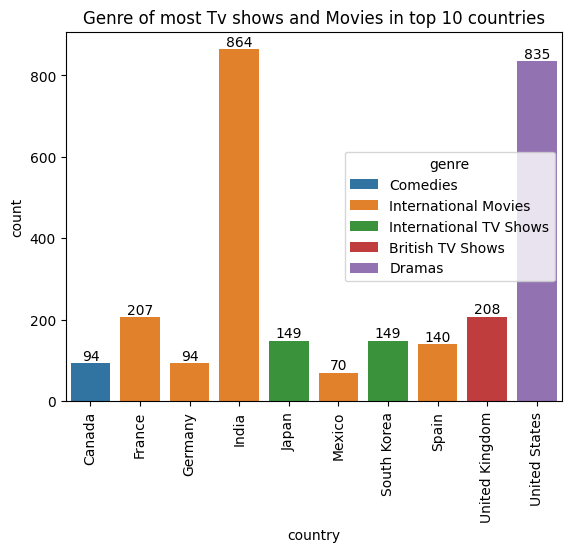

In [36]:
data_gc = pd.read_csv('top_genres_by_country copy.csv')
barplot = sns.barplot(data=data_gc, x='country', hue='genre', y='count')
plt.xticks(rotation=90)
plt.title('Genre of most Tv shows and Movies in top 10 countries')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f')

In [39]:
# remember i seperated the countries it is that dataset i used to create new one
data = split_countries_data.groupby(['country', 'rating']).agg({'show_id': 'count'})
data.to_csv('countries_ratings.csv')

In [40]:
countries = pd.read_csv('countries.csv')
countries = countries.head(10) # knowing the top 20 countries 

curr_data = pd.DataFrame(columns=['country', 'rating', 'count']) # creating data set

data_reset = data.reset_index()  # Reset the index to access 'country' and 'rating' columns directly

for _, row1 in countries.iterrows():
    for _, row2 in data_reset.iterrows():
        if row1['country'] == row2['country']:
            new_row = pd.DataFrame({'country': [row2['country']], 'rating':[row2['rating']], 'count': [row2['show_id']]})
            curr_data = pd.concat([curr_data, new_row], ignore_index=True)

In [41]:
curr_data.to_csv('countries_ratings.csv')

In [42]:
curr = pd.pivot(data=curr_data, index='country', columns='rating', values='count')        
curr

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,2,1,5,33,32,79,45,16,103,37,45,34,NaN,NaN
France,NaN,NaN,NaN,2,1,4,21,35,57,47,4,163,12,20,21,NaN,2
Germany,NaN,NaN,NaN,1,NaN,2,8,31,43,27,9,78,17,3,6,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,7,7,11,5,571,10,266,144,6,17,1,NaN
Japan,NaN,NaN,NaN,1,NaN,NaN,11,9,9,97,2,100,50,3,31,NaN,NaN
Mexico,NaN,NaN,NaN,NaN,NaN,4,2,4,14,22,3,102,12,NaN,6,NaN,NaN
South Korea,NaN,NaN,NaN,1,NaN,4,2,1,2,85,1,92,17,7,14,NaN,NaN
Spain,NaN,NaN,NaN,3,1,NaN,4,5,13,18,1,169,8,5,1,NaN,NaN
United Kingdom,NaN,NaN,NaN,4,NaN,12,35,84,145,100,24,243,94,33,12,NaN,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico')])

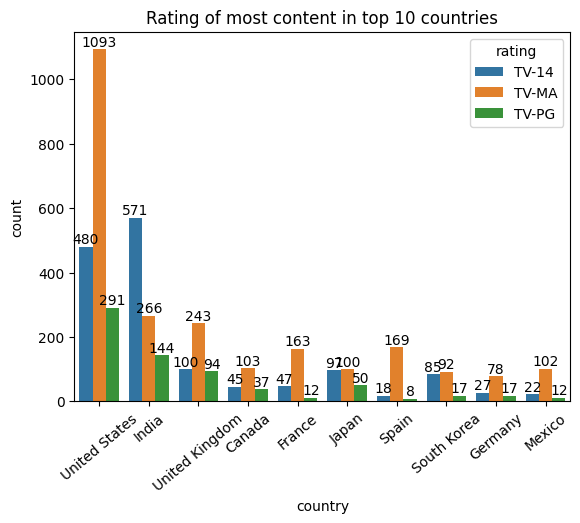

In [43]:
# just mannually saw top 3 which looked like most appeared hehe
data = curr_data[(curr_data['rating'] == 'TV-MA') | (curr_data['rating'] == 'TV-PG') | (curr_data['rating'] == 'TV-14')]
data
barplot = sns.barplot(data=data, x='country', y='count', hue='rating')
plt.title('Rating of most content in top 10 countries')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f')
plt.xticks(rotation=40)